In [1]:
import pandas as pd
import numpy as np
import pyarrow.parquet as pq
import matplotlib.pyplot as plt
import os
from matplotlib.colors import ListedColormap
from matplotlib.patches import Patch
from pathlib import Path
from importlib import reload
import src.utils as util
reload(util)

import src.load_parquet as load_parquet
reload(load_parquet)

import dask.dataframe as dd
import src.DataLoader as DataLoader
reload(DataLoader)
ROOT_DIR = Path('')
dataLoader = DataLoader.DataLoader(ROOT_DIR)


In [2]:
df_labevents = pd.read_csv('LABEVENTS.csv')
df_desc_labitems = pd.read_csv('D_LABITEMS.csv')

In [3]:
df_desc_labitems

,ROW_ID,ITEMID,LABEL,FLUID,CATEGORY,LOINC_CODE
0,546,51346,Blasts,Cerebrospinal Fluid (CSF),Hematology,26447-3
1,547,51347,Eosinophils,Cerebrospinal Fluid (CSF),Hematology,26451-5
2,548,51348,"Hematocrit, CSF",Cerebrospinal Fluid (CSF),Hematology,30398-2
3,549,51349,Hypersegmented Neutrophils,Cerebrospinal Fluid (CSF),Hematology,26506-6
4,550,51350,Immunophenotyping,Cerebrospinal Fluid (CSF),Hematology,NaN
...,...,...,...,...,...,...
748,749,51551,VOIDED SPECIMEN,OTHER BODY FLUID,HEMATOLOGY,NaN
749,750,51552,VOIDED SPECIMEN,STOOL,CHEMISTRY,NaN
750,751,51553,VOIDED SPECIMEN,URINE,CHEMISTRY,NaN
751,752,51554,VOIDED SPECIMEN,JOINT FLUID,HEMATOLOGY,NaN


In [4]:
df_labevents

,ROW_ID,SUBJECT_ID,HADM_ID,ITEMID,CHARTTIME,VALUE,VALUENUM,VALUEUOM,FLAG
0,281,3,NaN,50820,2101-10-12 16:07:00,7.39,7.39,units,NaN
1,282,3,NaN,50800,2101-10-12 18:17:00,ART,NaN,NaN,NaN
2,283,3,NaN,50802,2101-10-12 18:17:00,-1,-1.00,mEq/L,NaN
3,284,3,NaN,50804,2101-10-12 18:17:00,22,22.00,mEq/L,NaN
4,285,3,NaN,50808,2101-10-12 18:17:00,0.93,0.93,mmol/L,abnormal
...,...,...,...,...,...,...,...,...,...
27854050,27428435,96443,103219.0,50882,2109-12-30 01:40:00,26,26.00,mEq/L,NaN
27854051,27428436,96443,103219.0,50885,2109-12-30 01:40:00,2.1,2.10,mg/dL,abnormal
27854052,27428437,96443,103219.0,50902,2109-12-30 01:40:00,97,97.00,mEq/L,NaN
27854053,27428438,96443,103219.0,50911,2109-12-30 01:40:00,2,2.00,ng/mL,NaN


In [5]:

df_demographic = pd.read_csv("demographic.csv")
df_demographic = df_demographic[["SUBJECT_ID","HADM_ID","IS_SEPSIS"]]

In [6]:
df_demographic["IS_SEPSIS"]

0        0
1        0
2        0
3        0
4        0
        ..
58971    0
58972    1
58973    0
58974    0
58975    0
Name: IS_SEPSIS, Length: 58976, dtype: int64

In [7]:
# reading the D_LABITEMS file for getting the item names
df_ditem = pd.read_csv("D_LABITEMS.csv")

In [8]:
df_ditem

,ROW_ID,ITEMID,LABEL,FLUID,CATEGORY,LOINC_CODE
0,546,51346,Blasts,Cerebrospinal Fluid (CSF),Hematology,26447-3
1,547,51347,Eosinophils,Cerebrospinal Fluid (CSF),Hematology,26451-5
2,548,51348,"Hematocrit, CSF",Cerebrospinal Fluid (CSF),Hematology,30398-2
3,549,51349,Hypersegmented Neutrophils,Cerebrospinal Fluid (CSF),Hematology,26506-6
4,550,51350,Immunophenotyping,Cerebrospinal Fluid (CSF),Hematology,NaN
...,...,...,...,...,...,...
748,749,51551,VOIDED SPECIMEN,OTHER BODY FLUID,HEMATOLOGY,NaN
749,750,51552,VOIDED SPECIMEN,STOOL,CHEMISTRY,NaN
750,751,51553,VOIDED SPECIMEN,URINE,CHEMISTRY,NaN
751,752,51554,VOIDED SPECIMEN,JOINT FLUID,HEMATOLOGY,NaN


In [9]:
# List all Parquet files in the output folder
output_dir = 'labevents_transform_sepsis_parquet'
parquet_files = [f'{output_dir}/{file}' for file in os.listdir(output_dir) if file.endswith('.parquet')]

# Read all Parquet files into a list of DataFrames
dfs = [pd.read_parquet(file) for file in parquet_files]

# Concatenate the list of DataFrames into a single DataFrame
df_labevents_sepsis = pd.concat(dfs, ignore_index=True)
df_labevents_sepsis.columns = df_labevents_sepsis.columns.str.upper()

In [10]:
df_labevents_sepsis

,SUBJECT_ID,HADM_ID,CHARTTIME,IS_SEPSIS,FLAG_50800,FLAG_50801,FLAG_50802,FLAG_50803,FLAG_50804,FLAG_50805,...,FLAG_51546,FLAG_51547,FLAG_51548,FLAG_51549,FLAG_51550,FLAG_51551,FLAG_51552,FLAG_51553,FLAG_51554,FLAG_51555
0,38,185910,2166-08-18 12:15:00,1,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
1,38,185910,2166-08-31 01:39:00,1,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
2,38,185910,2166-08-31 04:31:00,1,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
3,38,185910,2166-08-31 04:43:00,1,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
4,38,185910,2166-08-31 09:12:00,1,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
317146,98797,105447,2132-12-24 23:07:00,1,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
317147,98797,105447,2132-12-24 23:28:00,1,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
317148,98797,105447,2132-12-24 23:45:00,1,None,None,None,None,abnormal,None,...,None,None,None,None,None,None,None,None,None,None
317149,98797,105447,2132-12-25 06:56:00,1,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None


In [11]:
#df = df_labevents_sepsis.copy()

In [12]:
#df.columns

In [13]:
#op_data = pd.DataFrame()
dict_count ={}
for i in df_labevents_sepsis.columns[4:]:
    abnormal_rows = df_labevents_sepsis[df_labevents_sepsis[i] == 'abnormal'][['SUBJECT_ID', 'HADM_ID']]
    
    # Find unique combinations of 'subject_id' and 'hadm_id'
    unique_combinations = abnormal_rows.drop_duplicates()
    count_unique = len(unique_combinations)
    if count_unique != 0:
        dict_count[i[5:]] = count_unique
        

print(dict_count)

{'50803': 395, '50804': 3383, '50805': 6, '50806': 947, '50808': 2769, '50809': 2305, '50811': 2002, '50813': 3587, '50814': 9, '50818': 3891, '50820': 3920, '50821': 4246, '50822': 1523, '50824': 997, '50852': 213, '50853': 17, '50856': 30, '50861': 2391, '50862': 4118, '50863': 2903, '50864': 17, '50865': 11, '50866': 234, '50867': 945, '50868': 2642, '50873': 5, '50876': 2, '50878': 3024, '50881': 14, '50882': 4682, '50883': 1245, '50885': 1901, '50889': 711, '50890': 72, '50891': 35, '50892': 30, '50893': 4928, '50894': 1, '50895': 7, '50896': 26, '50898': 6, '50899': 13, '50900': 55, '50902': 4589, '50905': 18, '50906': 3, '50907': 36, '50908': 373, '50909': 1789, '50910': 2545, '50911': 827, '50912': 4244, '50914': 54, '50915': 198, '50916': 1, '50917': 281, '50922': 40, '50924': 1160, '50926': 6, '50927': 255, '50928': 1, '50929': 468, '50930': 84, '50931': 5150, '50935': 950, '50941': 1, '50943': 12, '50945': 6, '50949': 93, '50950': 177, '50951': 95, '50952': 1081, '50953': 14

In [14]:
total_sepsis = len(df_labevents_sepsis[['SUBJECT_ID', 'HADM_ID']].drop_duplicates())
total_sepsis

5402

In [15]:
sorted_dict_count = dict(sorted(dict_count.items(), key=lambda item: item[1], reverse=True))
# print(sorted_dict)

In [16]:
df_sorted_count = pd.DataFrame(list(sorted_dict_count.items()), columns=['ITEMID', 'COUNT_ABNORMAL'])

In [17]:
df_sorted_count

,ITEMID,COUNT_ABNORMAL
0,51222,5288
1,51221,5282
2,51279,5282
3,50931,5150
4,51256,5032
...,...,...
266,51435,1
267,51443,1
268,51456,1
269,51459,1


In [18]:
type(df_sorted_count["ITEMID"][0])

str

In [19]:
df_ditem["ITEMID"] = df_ditem["ITEMID"].astype(str)
result_count = pd.merge(df_sorted_count, df_ditem, left_on='ITEMID', right_on='ITEMID', how='inner')

In [20]:
result_count = result_count[["ITEMID","COUNT_ABNORMAL","FLUID"]]
result_count

,ITEMID,COUNT_ABNORMAL,FLUID
0,51222,5288,Blood
1,51221,5282,Blood
2,51279,5282,Blood
3,50931,5150,Blood
4,51256,5032,Blood
...,...,...,...
266,51435,1,Other Body Fluid
267,51443,1,Pleural
268,51456,1,Pleural
269,51459,1,Pleural


In [21]:
result_count["FLUID"] = result_count["FLUID"].str.capitalize()
result_count["FLUID"].value_counts()

FLUID
Blood                        184
Pleural                       20
Ascites                       18
Other body fluid              17
Urine                         16
Joint fluid                   13
Cerebrospinal fluid (csf)      3
Name: count, dtype: int64

C:\Users\apata\AppData\Local\Temp\ipykernel_16420\2341813693.py:28: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(result_count["ITEMID"], rotation=90)
C:\Users\apata\AppData\Local\Temp\ipykernel_16420\2341813693.py:29: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([key[:-7] for key in keys], rotation=90)


<Figure size 3000x1200 with 0 Axes>

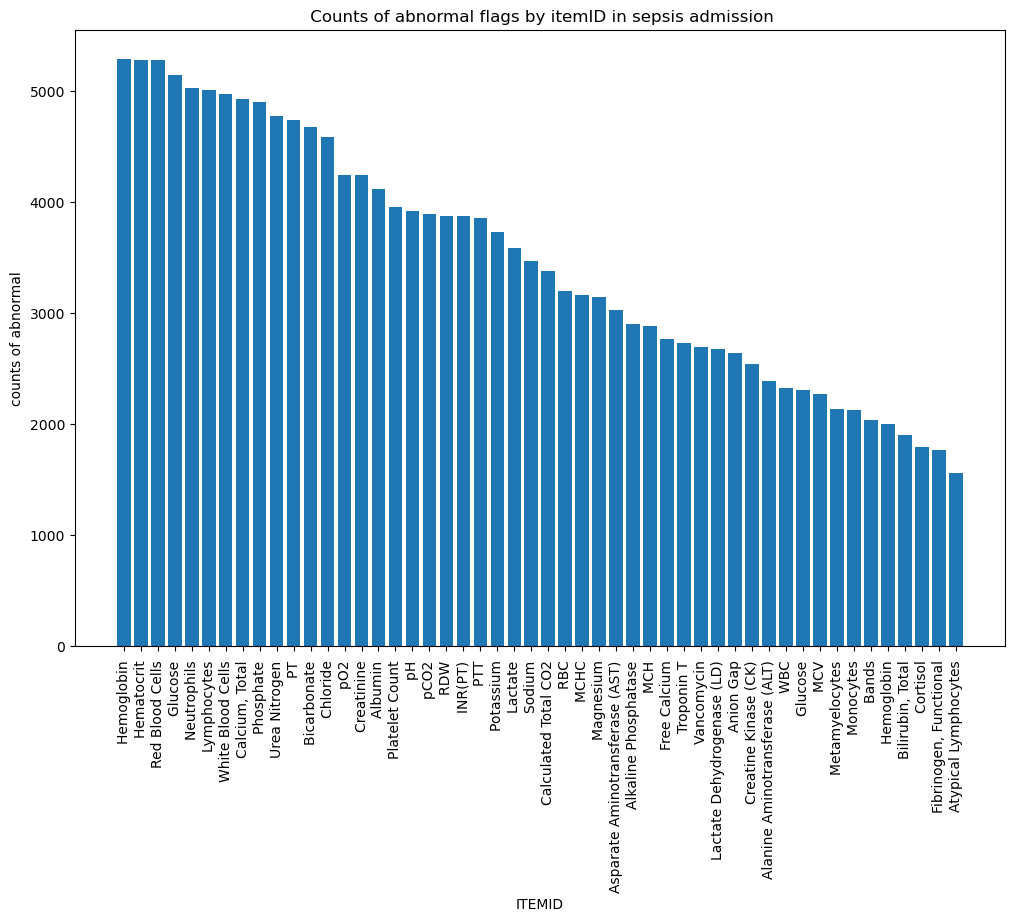

In [22]:
sorted_flags = list(sorted_dict_count.items())
top_n_flags = sorted_flags[:50]
top_n_flags = dict(top_n_flags)

keys = top_n_flags.keys()
modified_list = ["ITEMID_" + item for item in keys]
keys = dataLoader.convert_itemid_to_title(modified_list, df_desc_labitems).values()


values = top_n_flags.values()

plt.figure(figsize=(30,12))



# Create a figure and axis
fig, ax = plt.subplots(figsize=(12, 8))



bars = ax.bar(keys, values)

# Set labels and title
ax.set_xlabel('ITEMID')
ax.set_ylabel('counts of abnormal')
ax.set_title(" Counts of abnormal flags by itemID in sepsis admission")

ax.set_xticklabels(result_count["ITEMID"], rotation=90)
ax.set_xticklabels([key[:-7] for key in keys], rotation=90)
# Show the plot
plt.show()

## colours based on Fluid

In [23]:
color_mapping = {
    'Blood': 'skyblue',
    'Pleural': 'teal',
    'Ascites': 'brown',
    'Other body fluid': 'blue',
    'Urine': 'purple',
    'Joint fluid': 'orange',
    'Cerebrospinal fluid (csf)': 'pink'
    # Add more color mappings as needed
}

In [24]:
result_count['color'] = result_count['FLUID'].map(color_mapping)

In [25]:
result_count

,ITEMID,COUNT_ABNORMAL,FLUID,color
0,51222,5288,Blood,skyblue
1,51221,5282,Blood,skyblue
2,51279,5282,Blood,skyblue
3,50931,5150,Blood,skyblue
4,51256,5032,Blood,skyblue
...,...,...,...,...
266,51435,1,Other body fluid,blue
267,51443,1,Pleural,teal
268,51456,1,Pleural,teal
269,51459,1,Pleural,teal


C:\Users\apata\AppData\Local\Temp\ipykernel_16420\4244222143.py:30: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([key[:-7] for key in keys], rotation=90)


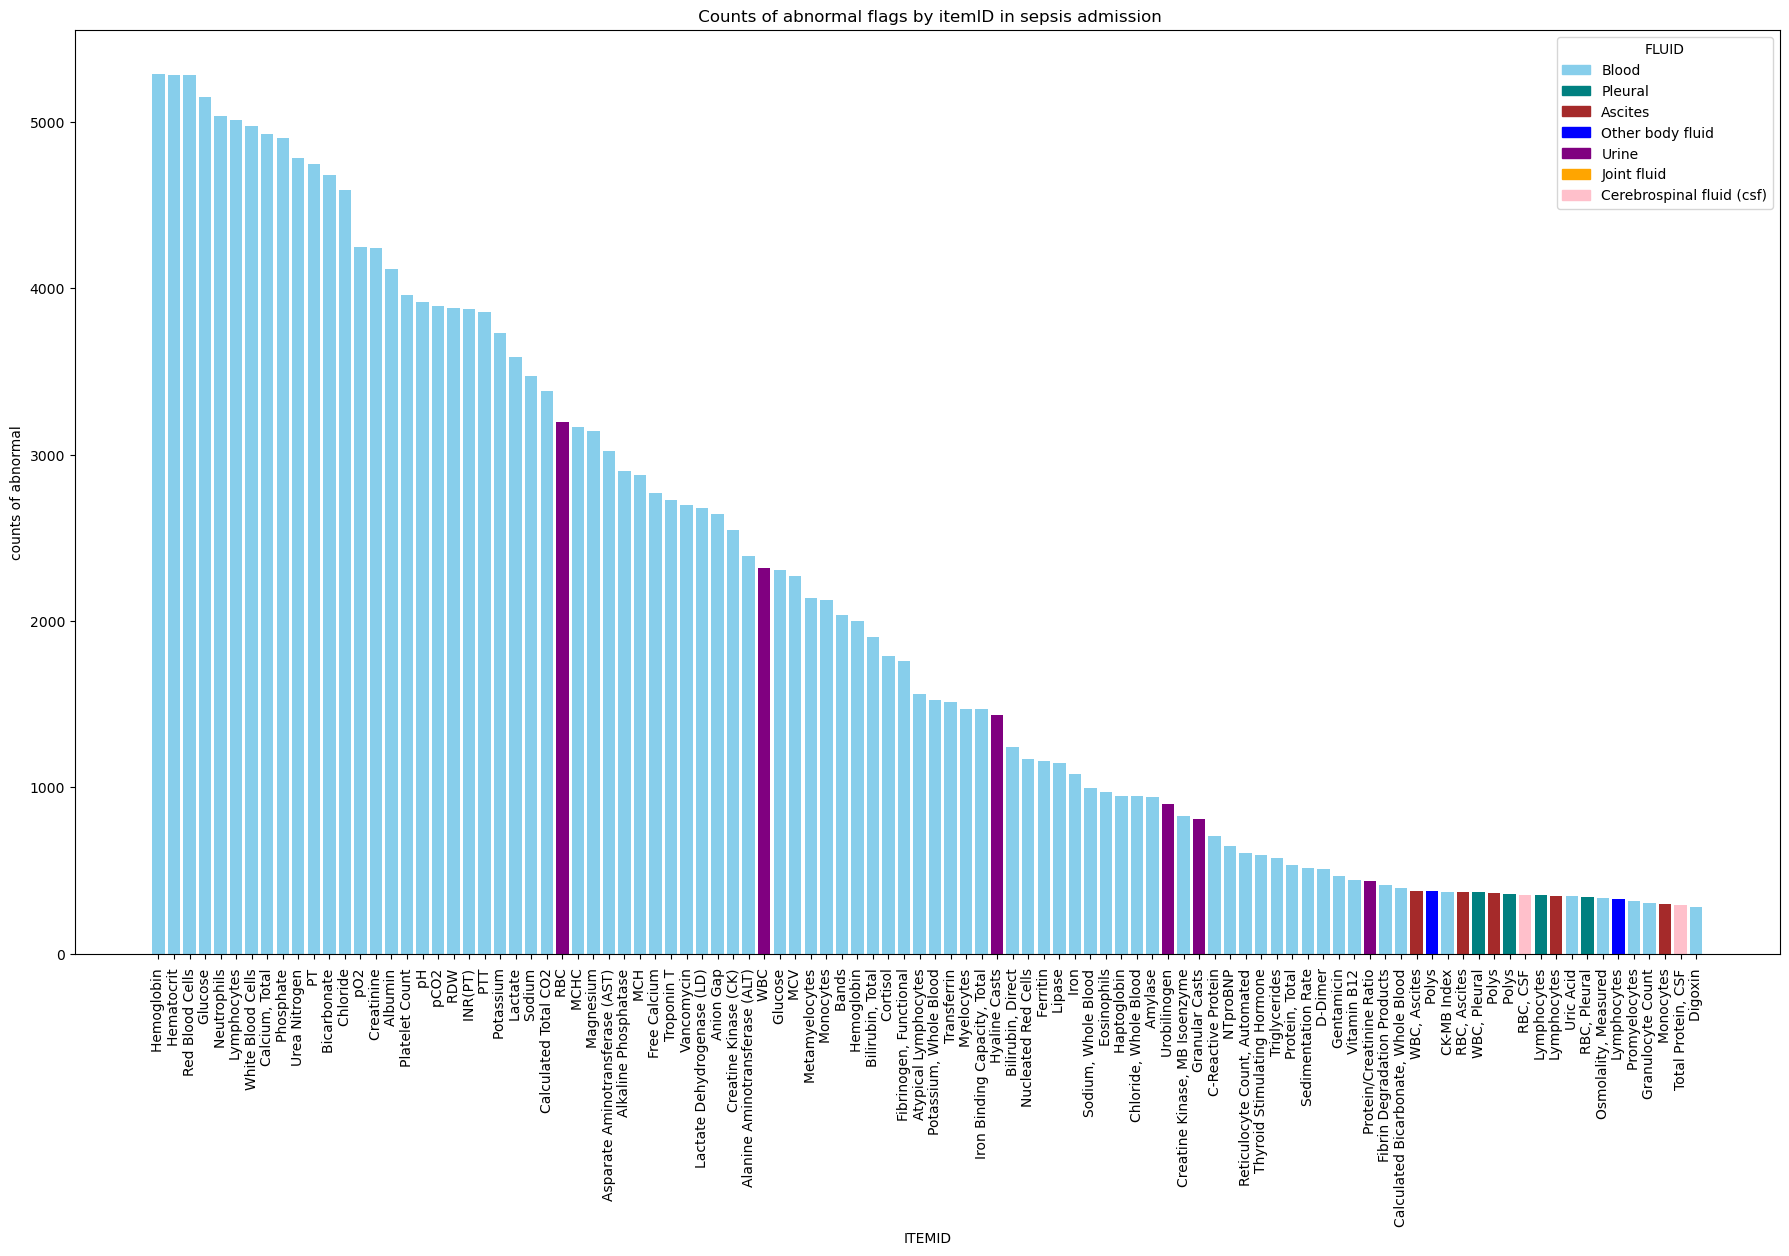

In [26]:
# show top 100
result_top = result_count[:100]

# Create a figure and axis
fig, ax = plt.subplots(figsize=(22, 12))

# Initialize a list to store legend handles and labels
legend_handles = []

# Plot the bars with custom colors and labels
for FLUID, color in color_mapping.items():
    legend_handles.append(Patch(color=color, label=FLUID))
    #bars = result_top[result_top['FLUID'] == FLUID]
    #ax.bar(bars['FLUID'], bars['COUNT_ABNORMAL'], color=color, label=FLUID)

modified_top_100 = ["ITEMID_" + item for item in result_top["ITEMID"]]
keys = dataLoader.convert_itemid_to_title(modified_top_100, df_desc_labitems).values()

# Plot the bars with custom colors
bars = ax.bar(result_top['ITEMID'], result_top['COUNT_ABNORMAL'], color=result_top["color"])

# Set labels and title
ax.set_xlabel('ITEMID')
ax.set_ylabel('counts of abnormal')
ax.set_title(" Counts of abnormal flags by itemID in sepsis admission")

# Show the legend
ax.legend(title='FLUID',handles=legend_handles)

ax.set_xticklabels([key[:-7] for key in keys], rotation=90)
# Show the plot
plt.show()

In [27]:
result_count

,ITEMID,COUNT_ABNORMAL,FLUID,color
0,51222,5288,Blood,skyblue
1,51221,5282,Blood,skyblue
2,51279,5282,Blood,skyblue
3,50931,5150,Blood,skyblue
4,51256,5032,Blood,skyblue
...,...,...,...,...
266,51435,1,Other body fluid,blue
267,51443,1,Pleural,teal
268,51456,1,Pleural,teal
269,51459,1,Pleural,teal


C:\Users\apata\AppData\Local\Temp\ipykernel_16420\3653584087.py:37: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([key[:-7] for key in keys], rotation=90)


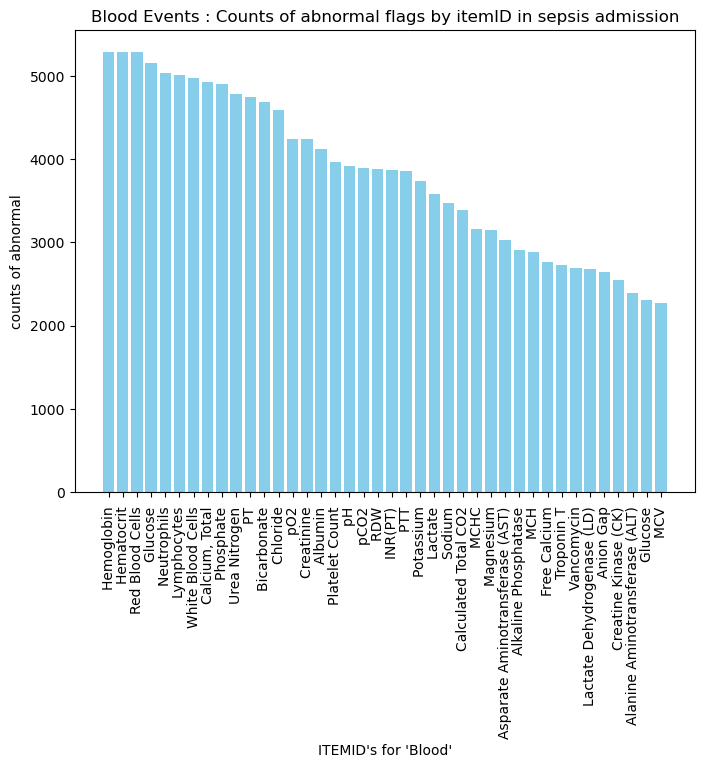

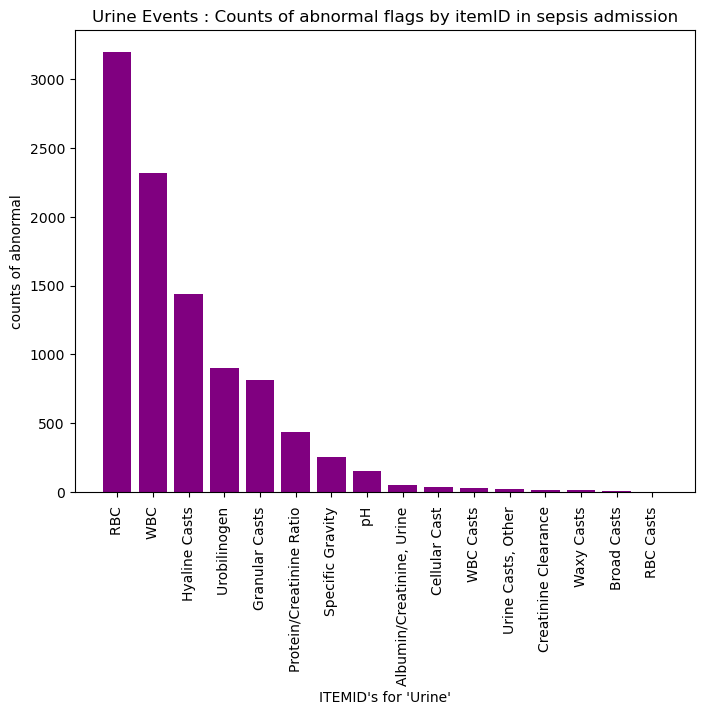

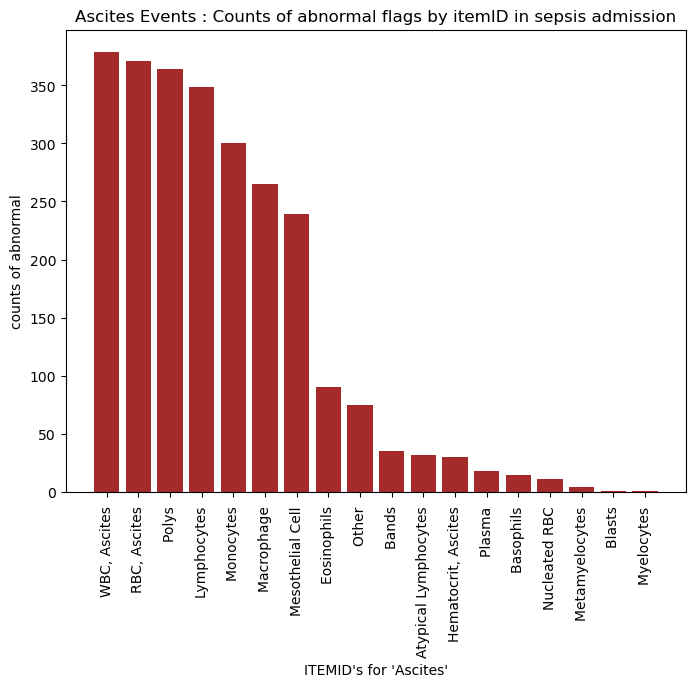

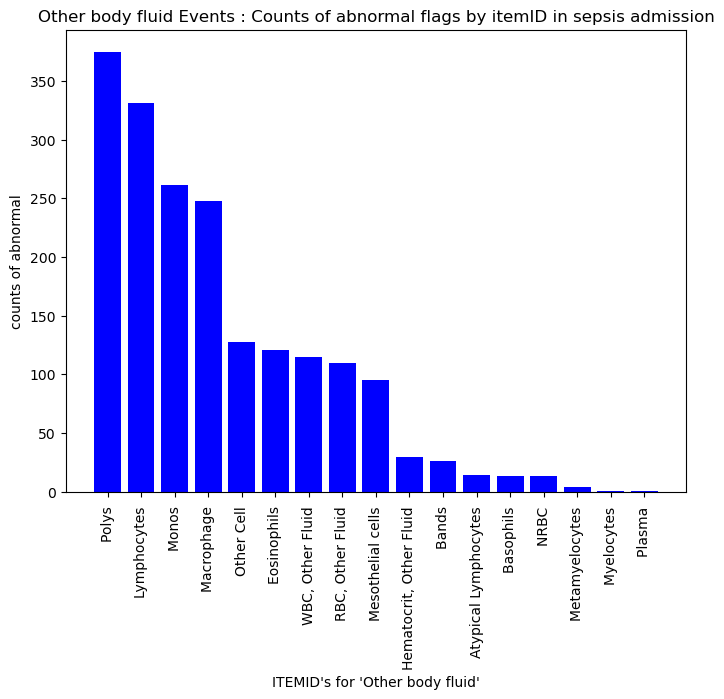

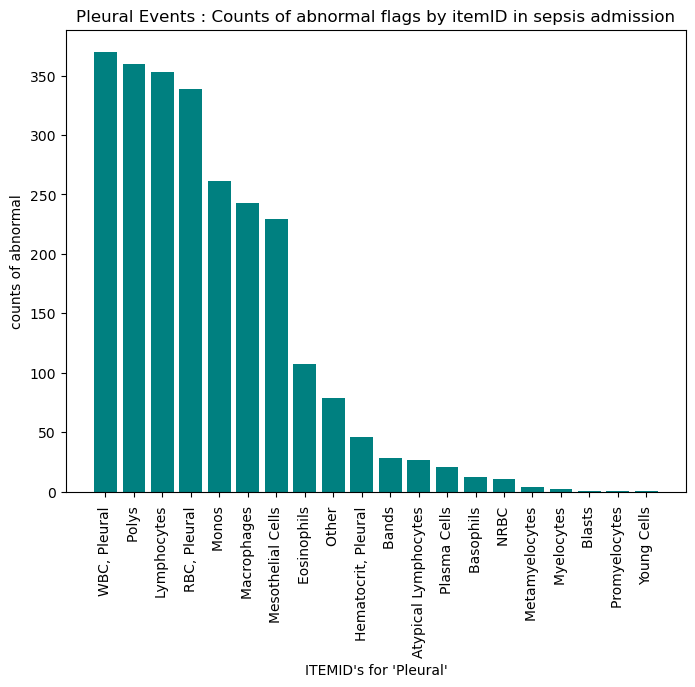

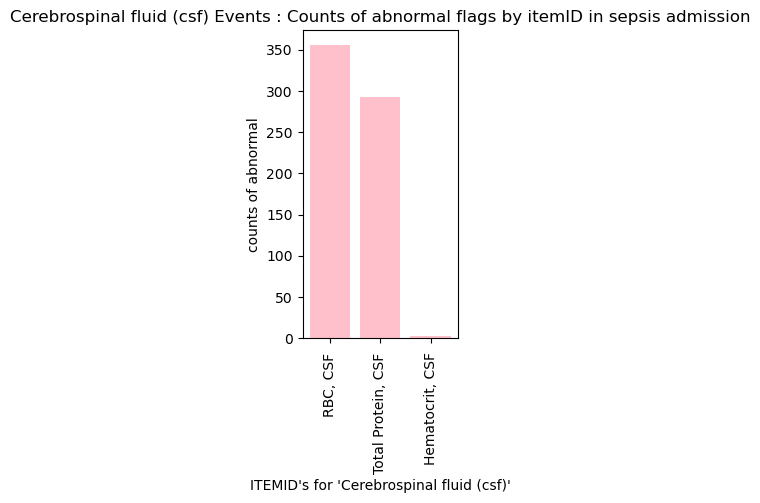

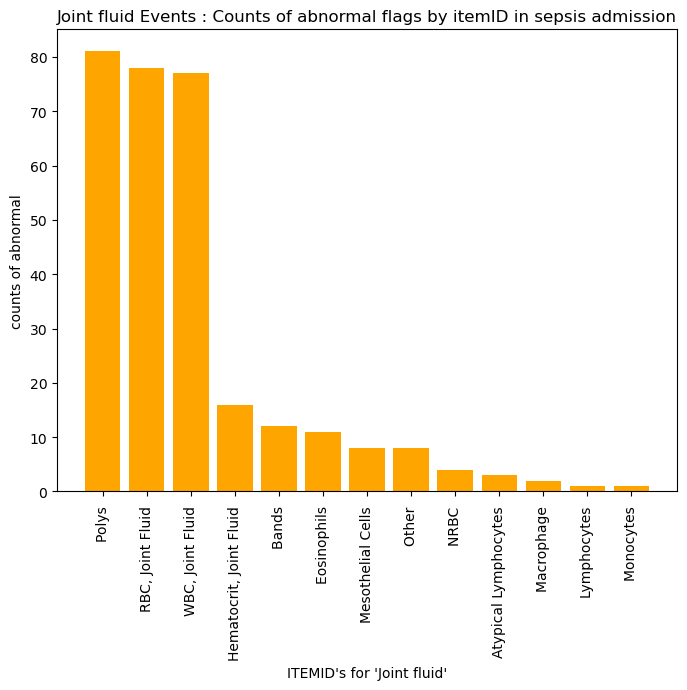

In [28]:

unique_values = result_count['FLUID'].unique()

# Create a dictionary to store DataFrames for each unique value
data_frames_by_fluid = {}

# Split the DataFrame based on unique values in 'Category2'
for value in unique_values:
    data_frames_by_fluid[value] = result_count[result_count['FLUID'] == value]

# Access DataFrames for each unique value
for value, sub_df in data_frames_by_fluid.items():
    #print(f"DataFrame for FLUID = {value}:")
    
    # Create a figure and axis
    # fig, ax = plt.subplots(figsize=(8, 6))
    
    if len(sub_df) > 40:
        sub_df = sub_df[:40]
    if len(sub_df) < 5:
        fig, ax = plt.subplots(figsize=(2, 4))
    else:
        fig, ax = plt.subplots(figsize=(8, 6))
    #sub_df_30 = sub_df[:30]
    
    # Plot the bars with custom colors
    bars = ax.bar(sub_df['ITEMID'], sub_df['COUNT_ABNORMAL'], color=sub_df["color"])

    # Set labels and title
    ax.set_xlabel(f"ITEMID's for '{value}'")
    ax.set_ylabel('counts of abnormal')
    ax.set_title(f"{value} Events : Counts of abnormal flags by itemID in sepsis admission")

    modified_labels = ["ITEMID_" + item for item in sub_df["ITEMID"]]
    keys = dataLoader.convert_itemid_to_title(modified_labels, df_desc_labitems).values()


    ax.set_xticklabels([key[:-7] for key in keys], rotation=90)
    # Show the plot
    plt.show()
    print("\n")
    
    

In [29]:
len(df_labevents_sepsis[['SUBJECT_ID', 'HADM_ID']].value_counts())

5402

###  For non-sepsis

In [30]:
top_30_itemid = result_top["ITEMID"][:30].values
top_30_itemid

array(['51222', '51221', '51279', '50931', '51256', '51244', '51301',
       '50893', '50970', '51006', '51274', '50882', '50902', '50821',
       '50912', '50862', '51265', '50820', '50818', '51277', '51237',
       '51275', '50971', '50813', '50983', '50804', '51493', '51249',
       '50960', '50878'], dtype=object)

In [31]:
df_labevents_all = df_labevents.merge(df_demographic[['SUBJECT_ID','HADM_ID','IS_SEPSIS']])

df_labevents_nonsepsis = df_labevents_all[df_labevents_all["IS_SEPSIS"]==0]


In [34]:
df_labevents_all

,ROW_ID,SUBJECT_ID,HADM_ID,ITEMID,CHARTTIME,VALUE,VALUENUM,VALUEUOM,FLAG,IS_SEPSIS
0,441,3,145834.0,50868,2101-10-20 16:40:00,17,17.00,mEq/L,NaN,0
1,442,3,145834.0,50882,2101-10-20 16:40:00,25,25.00,mEq/L,NaN,0
2,443,3,145834.0,50893,2101-10-20 16:40:00,8.2,8.20,mg/dL,abnormal,0
3,444,3,145834.0,50902,2101-10-20 16:40:00,99,99.00,mEq/L,abnormal,0
4,445,3,145834.0,50910,2101-10-20 16:40:00,48,48.00,IU/L,NaN,0
...,...,...,...,...,...,...,...,...,...,...
22245029,27730265,98761,184477.0,51265,2186-01-16 11:25:00,375,375.00,K/uL,NaN,0
22245030,27730266,98761,184477.0,51274,2186-01-16 11:25:00,14.0,14.00,sec,abnormal,0
22245031,27730267,98761,184477.0,51277,2186-01-16 11:25:00,13.2,13.20,%,NaN,0
22245032,27730268,98761,184477.0,51279,2186-01-16 11:25:00,3.61,3.61,m/uL,abnormal,0


In [35]:
total_nonsepsis = len(df_labevents_nonsepsis[['SUBJECT_ID','HADM_ID']].drop_duplicates())

In [36]:
dict_count_nonsepsis ={}
for i in top_30_itemid:
    count = len(df_labevents_nonsepsis[(df_labevents_nonsepsis["ITEMID"]==int(i)) &
        (df_labevents_nonsepsis["FLAG"]=="abnormal") 
        ].drop_duplicates(['SUBJECT_ID','HADM_ID']) )
    dict_count_nonsepsis[i]=count
print(dict_count_nonsepsis)


{'51222': 47533, '51221': 46497, '51279': 45205, '50931': 43343, '51256': 32894, '51244': 30206, '51301': 36573, '50893': 31209, '50970': 31963, '51006': 32038, '51274': 32564, '50882': 28355, '50902': 30365, '50821': 26470, '50912': 21309, '50862': 17546, '51265': 25410, '50820': 22844, '50818': 22641, '51277': 24408, '51237': 21261, '51275': 24691, '50971': 22098, '50813': 16410, '50983': 18396, '50804': 14814, '51493': 15118, '51249': 26482, '50960': 17054, '50878': 13336}


In [38]:
df_ditem = df_desc_labitems.copy()    #####
df_ditem["ITEMID"] = df_ditem["ITEMID"].astype(str)
result_count_nonsepsis = pd.merge(pd.DataFrame(list(dict_count_nonsepsis.items()), columns=['ITEMID', 'COUNT_ABNORMAL']), df_ditem, left_on='ITEMID', right_on='ITEMID', how='inner')
result_count_nonsepsis = result_count_nonsepsis[["ITEMID","COUNT_ABNORMAL","FLUID"]]
result_count_nonsepsis["FLUID"] = result_count_nonsepsis["FLUID"].str.capitalize()



C:\Users\apata\AppData\Local\Temp\ipykernel_16420\2886937262.py:30: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([key[:-7] for key in keys], rotation=90)


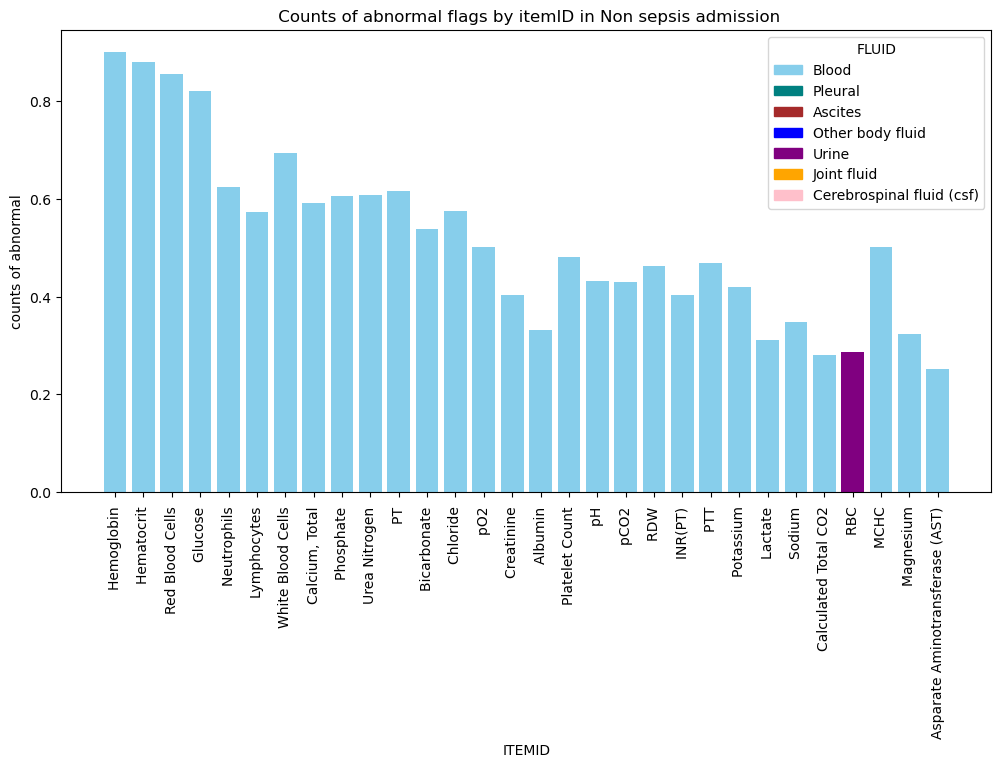

In [41]:
result_count_nonsepsis['color'] = result_count['FLUID'].map(color_mapping)
# Create a figure and axis
fig, ax = plt.subplots(figsize=(12, 6))

# Initialize a list to store legend handles and labels
legend_handles = []

# Plot the bars with custom colors and labels
for FLUID, color in color_mapping.items():
    legend_handles.append(Patch(color=color, label=FLUID))
    #bars = result_top[result_top['FLUID'] == FLUID]
    #ax.bar(bars['FLUID'], bars['COUNT_ABNORMAL'], color=color, label=FLUID)



# Plot the bars with custom colors
bars = ax.bar(result_count_nonsepsis['ITEMID'], result_count_nonsepsis['COUNT_ABNORMAL']/total_nonsepsis, color=result_count_nonsepsis["color"])

# Set labels and title
ax.set_xlabel('ITEMID')
ax.set_ylabel('counts of abnormal')
ax.set_title(" Counts of abnormal flags by itemID in Non sepsis admission")

# Show the legend
ax.legend(title='FLUID',handles=legend_handles)

modified_id = ["ITEMID_" + item for item in result_count_nonsepsis['ITEMID']]
keys = dataLoader.convert_itemid_to_title(modified_id, df_desc_labitems).values()

ax.set_xticklabels([key[:-7] for key in keys], rotation=90)
# Show the plot
plt.show()

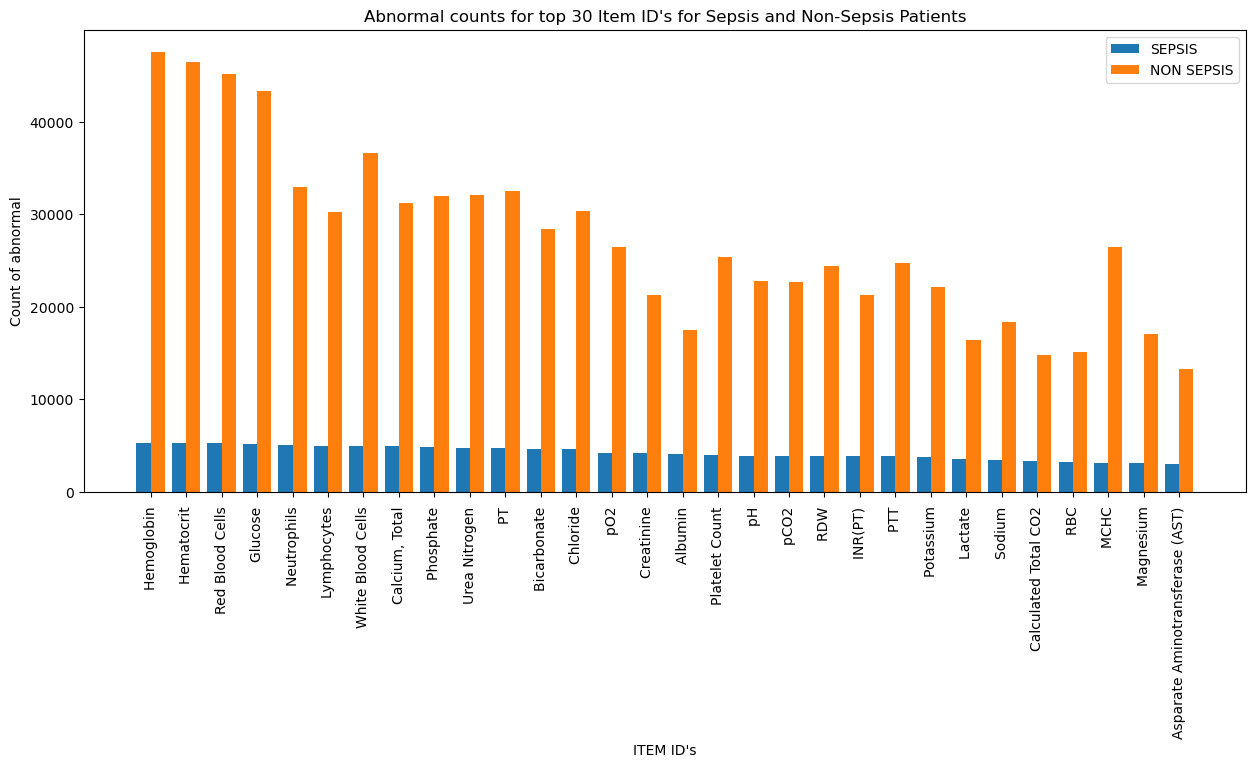

In [42]:
# for both sepsis and non-sepsis
result_count_sepsis = result_count[:30]  # for top _30


fig, ax = plt.subplots(figsize=(15, 6))
# Define the width of each bar
bar_width = 0.40

# Create an array of indices for the x-axis
x = np.arange(len(result_count_sepsis["ITEMID"]))

# Create the side-by-side bar chart
ax.bar(x - bar_width/2, result_count_sepsis["COUNT_ABNORMAL"], bar_width, label='SEPSIS')
ax.bar(x + bar_width/2, result_count_nonsepsis["COUNT_ABNORMAL"], bar_width, label='NON SEPSIS')

# Set labels and title
ax.set_xlabel("ITEM ID's")
ax.set_ylabel('Count of abnormal')
ax.set_title("Abnormal counts for top 30 Item ID's for Sepsis and Non-Sepsis Patients")

# Set the x-axis labels
ax.set_xticks(x)

modified_id = ["ITEMID_" + item for item in result_count_sepsis['ITEMID']]
keys = dataLoader.convert_itemid_to_title(modified_id, df_desc_labitems).values()

ax.set_xticklabels([key[:-7] for key in keys], rotation=90)


# Add a legend
ax.legend()
# Display the chart
plt.show()


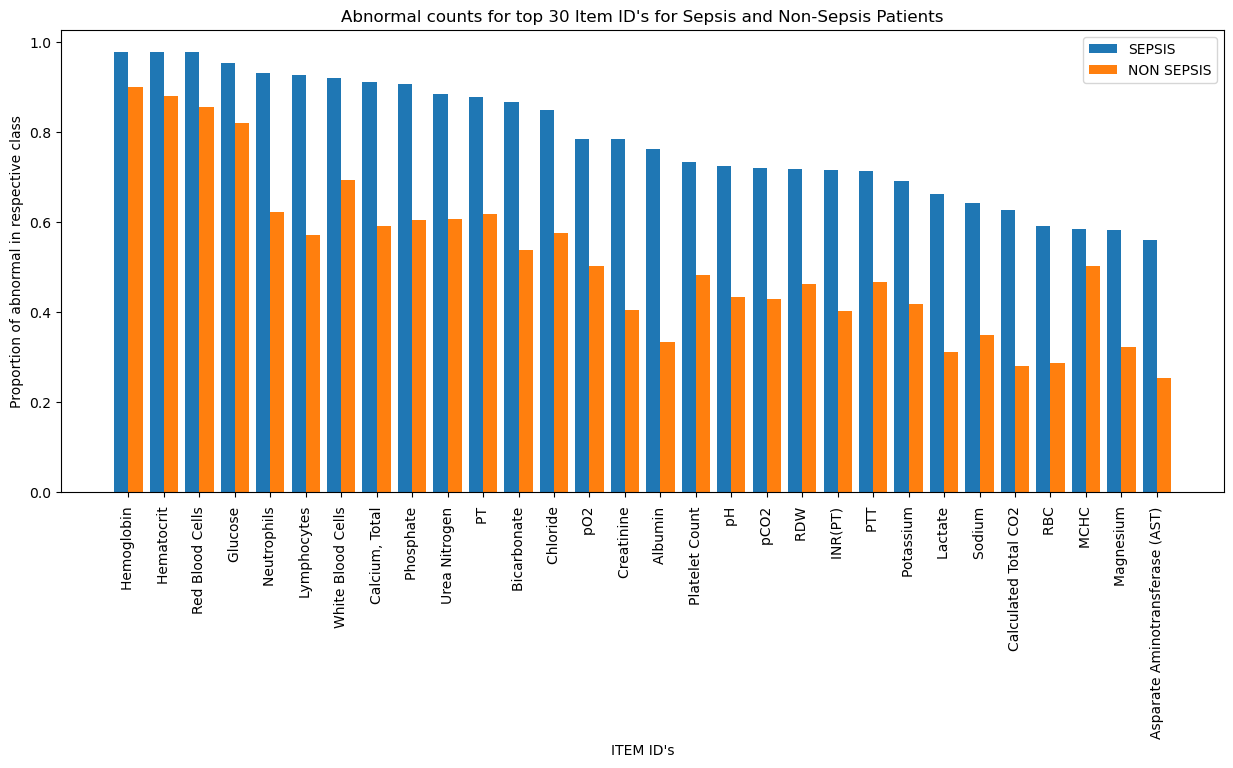

In [43]:

# for both sepsis and non-sepsis
result_count_sepsis = result_count[:30]  # for top _30


fig, ax = plt.subplots(figsize=(15, 6))
# Define the width of each bar
bar_width = 0.40

# Create an array of indices for the x-axis
x = np.arange(len(result_count_sepsis["ITEMID"]))

# Create the side-by-side bar chart
ax.bar(x - bar_width/2, result_count_sepsis["COUNT_ABNORMAL"]/total_sepsis, bar_width, label='SEPSIS')
ax.bar(x + bar_width/2, result_count_nonsepsis["COUNT_ABNORMAL"]/total_nonsepsis, bar_width, label='NON SEPSIS')

# Set labels and title
ax.set_xlabel("ITEM ID's")
ax.set_ylabel('Proportion of abnormal in respective class')
ax.set_title("Abnormal counts for top 30 Item ID's for Sepsis and Non-Sepsis Patients")

# Set the x-axis labels
ax.set_xticks(x)

modified_id = ["ITEMID_" + item for item in result_count_sepsis['ITEMID']]
keys = dataLoader.convert_itemid_to_title(modified_id, df_desc_labitems).values()

ax.set_xticklabels([key[:-7] for key in keys], rotation=90)



# Add a legend
ax.legend()
# Display the chart
plt.show()
